<a href="https://colab.research.google.com/github/manualAlan/046_eval1/blob/master/Ising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
conf = np.random.choice((1,-1),[3,3])
def Energy(conf, L):
  E = 0
  for i in range(L):
    for j in range(L):
      for k in [1,-1]:
        E = E-conf[i][j]*conf[(i+k)%L][(j)%L]
        E = E-conf[i][j]*conf[(i)%L][(j+k)%L]
  return E
Energy(conf, 3)
def deltaE(i,j, conf):
  L = len(conf)
  E = 0
  for k in [1,-1]:
    E = E+2*conf[i,j]*conf[(i+k)%L][(j)]
    E = E+2*conf[i,j]*conf[(i)][(j+k)%L]
  return E
print(Energy(conf, 3))
print(deltaE(1,1,conf))

4
0


In [ ]:
from numpy.core.numeric import binary_repr
import matplotlib.pyplot as plt
def MCMC(conf, sweep, beta):
  L = len(conf)
  histo = []
  for t in range(sweep):
    for t1 in range(L*L):
      i, j = np.random.randint(0, L), np.random.randint(0, L)
      dE = deltaE(i,j, conf)
      prob = np.random.uniform(0,1)
      if prob<np.exp(-beta*dE):
        conf[i,j] = -conf[i,j]
    bina = 0
    c = 0
    for i in range(L):
      for j in range(L):
        if conf[i,j] == 1:
          bina = bina + 1*2**c
          c = c + 1
        else:
          bina = bina + 0
          c = c+ 1
    histo.append(bina)
  return histo

In [ ]:
def Curve(beta):
  Es = []
  con = np.linspace(0,511,512)
  for i in con:
    confi = np.zeros([3,3])
    binary = str(bin(int(i)).replace("0b","").zfill(9))
    c = 8
    for x in range(3):
      for y in range(3):
        if binary[c] == '1':
          confi[x][y]=1
          c=c-1
        else:
          confi[x][y]=-1
          c=c-1
    Es.append(Energy(confi,3))
  return con, np.exp(-beta*np.array(Es))/sum(np.exp(-beta*np.array(Es)))


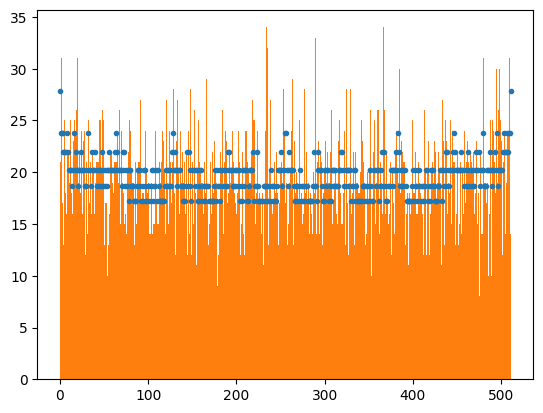

In [ ]:
conf = np.random.choice((1,-1),[3,3])
c, e = Curve(0.01)
histo = MCMC(conf,10000,0.01)
plt.plot(c,e*10000, '.')
plt.hist(histo, bins= 2**9)
plt.show()

In [ ]:
print(sum(e))

0.9999999999999997


In [ ]:
L = 81
conf = np.random.choice((1,-1),[L,L])
x,y=np.indices((L,L))
red=np.logical_and((x+y) % 2==0   , np.logical_and(x<L-1,y<L-1))
red[L-1,L-1]=True
blue=np.logical_and((x+y) % 2==1   , np.logical_and(x<L-1,y<L-1))
green=np.logical_and((x+y) % 2==0   , np.logical_or(x==L-1,y==L-1))
green[L-1,L-1]=False
yellow=np.logical_and((x+y) % 2==1   , np.logical_or(x==L-1,y==L-1))
colors = [red, blue, green, yellow]

In [ ]:
def FastEnergy(conf):
  E = 0
  for i in [1,-1]:
    for j in range(2):
      E = E - np.multiply(conf, np.roll(conf,i,axis=j))
  return E
def fastDeltaE(color, conf):
  newconf = conf.copy()
  newconf[color] = - newconf[color]
  dE = FastEnergy(newconf) - FastEnergy(conf)
  return dE
def fastMCMC(conf, sweep, beta, colors):
  histo = []
  for t in range(sweep):
    for color in colors:
        dE = np.exp(-beta*fastDeltaE(color, conf))
        prob = np.random.rand(L,L)
        flip = np.logical_and((prob < dE),color)
        conf[flip] = -conf[flip]
    bina = 0
    c = 0
    for i in range(L):
      for j in range(L):
        if conf[i,j] == 1:
          bina = bina + 1*2**c
          c = c + 1
        else:
          bina = bina + 0
          c = c+ 1
    histo.append(bina)
  return histo
#plt.hist(histo, density = True)
#plt.show()

In [ ]:
from numpy import *
import math

def UnweightedAvg(meanList,errorList):
    mean=sum(meanList)/(len(meanList)+0.0)
    error=0.0;
    for e in errorList:
        error=error+e*e
    error=sqrt(error)/len(errorList)
    return (mean,error)


def WeightedAvg (means, errors):
    zeroErrors = False
    for i in errors:
        if i == 0.0:
            zeroErrors = True

    if (not zeroErrors):
        weights = map (lambda x: 1.0/(x*x), errors)
        norm = 1.0/sum(weights)
        weights = map(lambda x: x*norm, weights)
        avg = 0.0
        error2 = 0.0
        for i in range (0,len(means)):
            avg = avg + means[i]*weights[i]
            error2 = error2 + weights[i]**2*errors[i]*errors[i]
        return (avg, math.sqrt(error2))
    else:
        return (sum(means)/len(means), 0.0)


def MeanErrorString (mean, error):
     if (mean!=0.0):
          meanDigits = math.floor(math.log(abs(mean))/math.log(10))
     else:
          meanDigits=2
     if (error!=0.0):
          rightDigits = -math.floor(math.log(error)/math.log(10))+1
     else:
          rightDigits=2
     if (rightDigits < 0):
          rightDigits = 0
     formatstr = '%1.' + '%d' % rightDigits + 'f'
     meanstr  = formatstr % mean
     errorstr = formatstr % error
     return (meanstr, errorstr)


def c(i,x,mean,var):
    N=len(x)
    if var==0:#if the variance is 0 return an effectively infinity corr
        return 1e100
#    print len(x([0:N-1])),len(x([i:N]))
    corr=1.0/var*1.0/(N-i)*sum((x[0:N-i]-mean)*(x[i:N]-mean))
    return corr

def Stats(x):
    N=len(x)
    mean=sum(x)/(N+0.0)
    xSquared=x*x
    var=sum(xSquared)/(N+0.0)-mean*mean
    i=0
    tempC=0.5
    kappa=0.0
    while (tempC>0 and i<(N-1)):
        kappa=kappa+2.0*tempC
        i=i+1
        tempC=c(i,x,mean,var)
    if kappa == 0.0:
        kappa = 1.0
    Neff=(N+0.0)/(kappa+0.0)
    error=sqrt(var/Neff)
    return (mean,var,error,kappa)

In [ ]:
L = 27
conf = np.random.choice((1,-1),[L,L])
x,y=np.indices((L,L))
red=np.logical_and((x+y) % 2==0   , np.logical_and(x<L-1,y<L-1))
red[L-1,L-1]=True
blue=np.logical_and((x+y) % 2==1   , np.logical_and(x<L-1,y<L-1))
green=np.logical_and((x+y) % 2==0   , np.logical_or(x==L-1,y==L-1))
green[L-1,L-1]=False
yellow=np.logical_and((x+y) % 2==1   , np.logical_or(x==L-1,y==L-1))
colors = [red, blue, green, yellow]
histo = fastMCMC(conf,1000,0.3, colors)

In [ ]:
def Curve1(beta):
  Es = []


KeyboardInterrupt: ignored

0.0


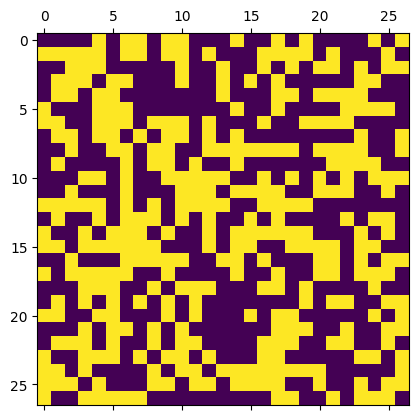

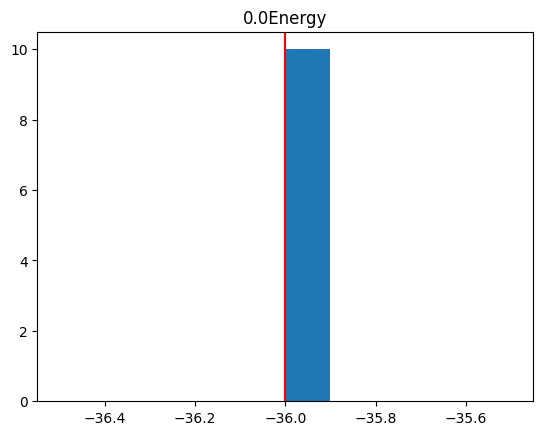

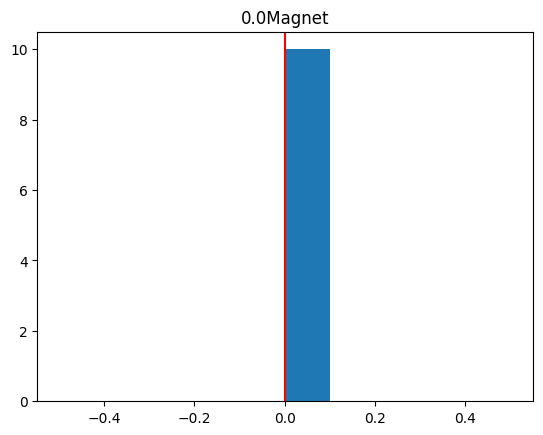

0.1


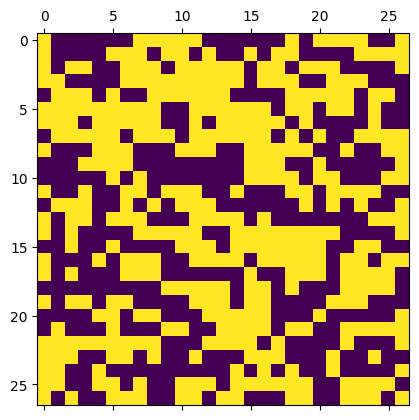

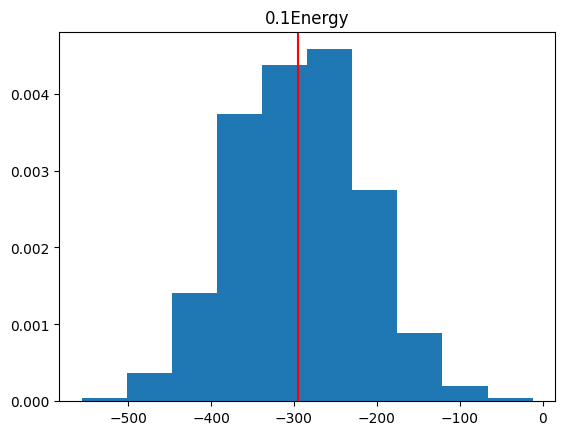

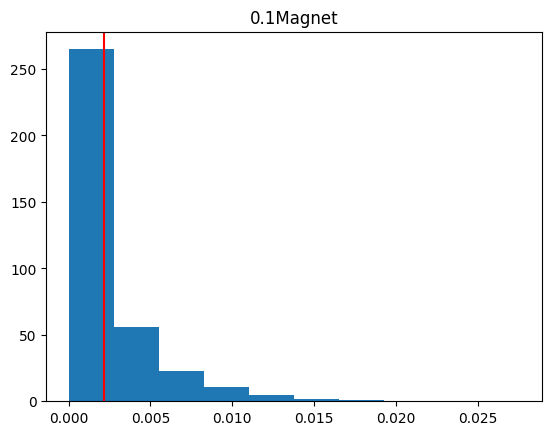

0.2


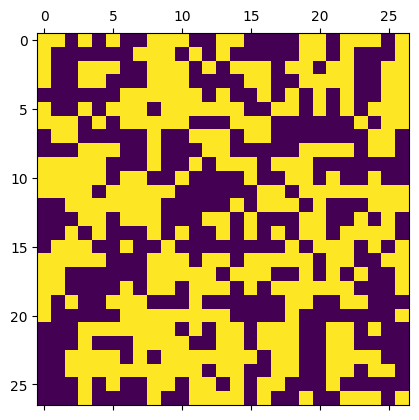

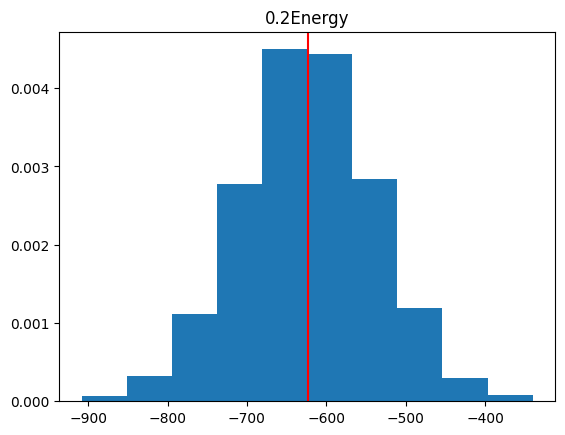

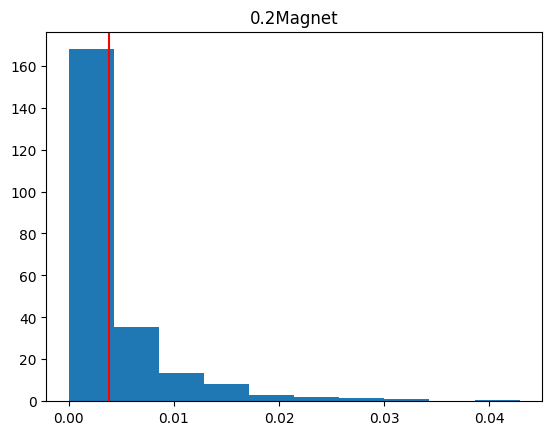

0.30000000000000004


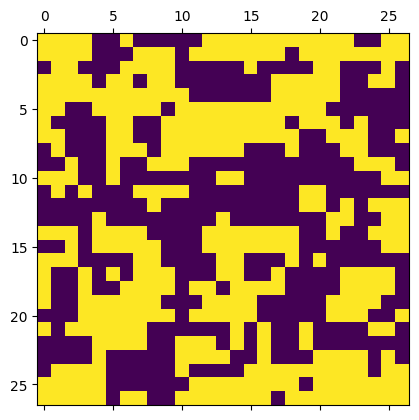

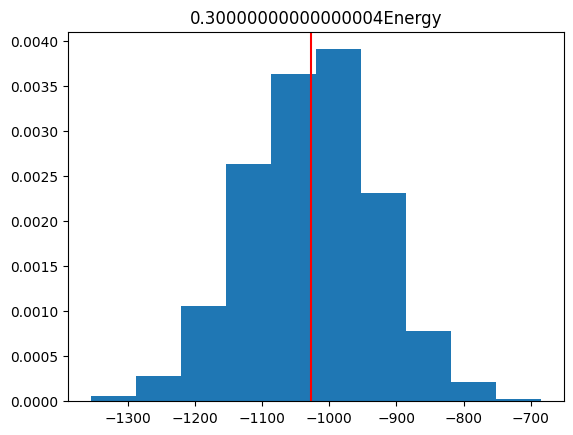

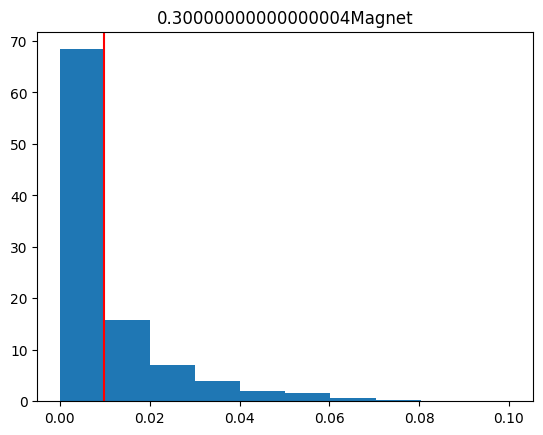

0.4


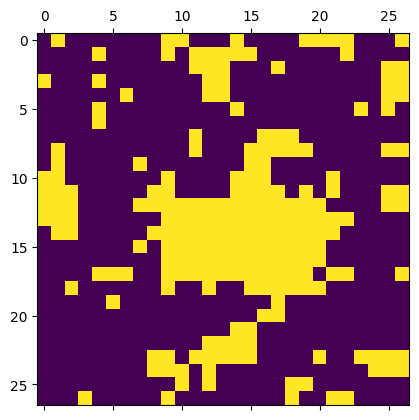

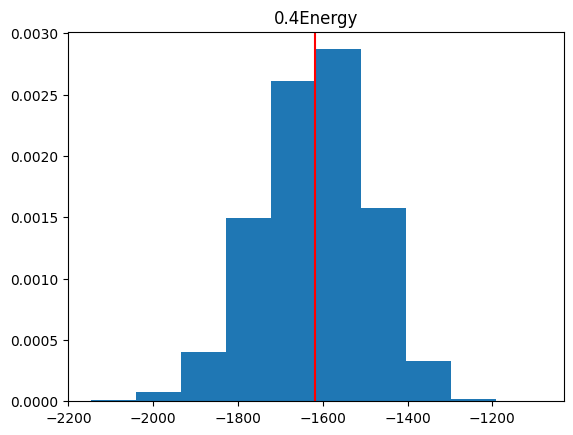

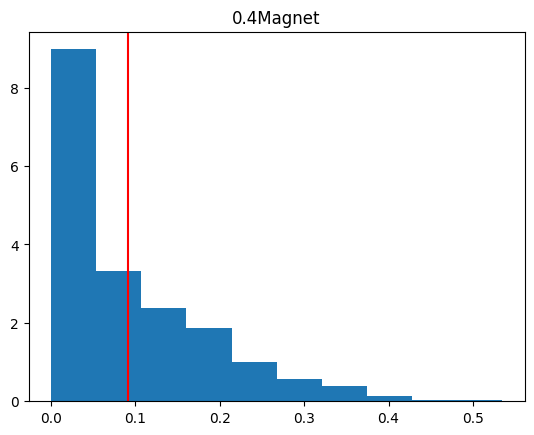

0.5


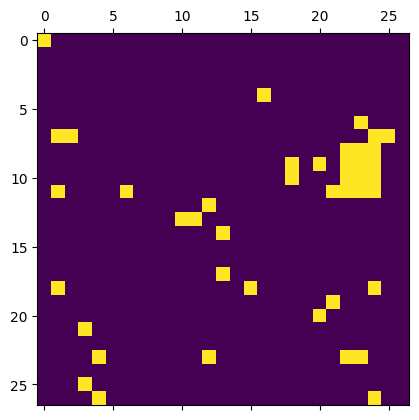

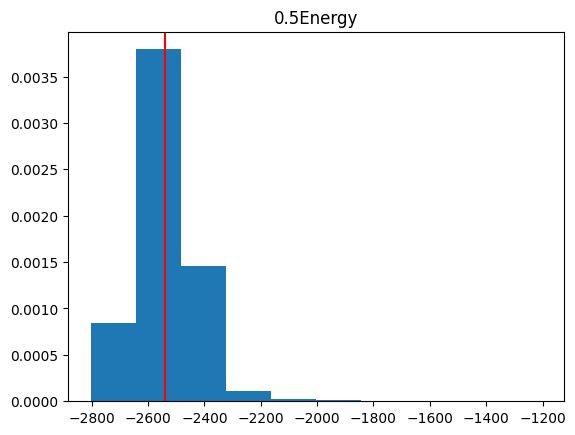

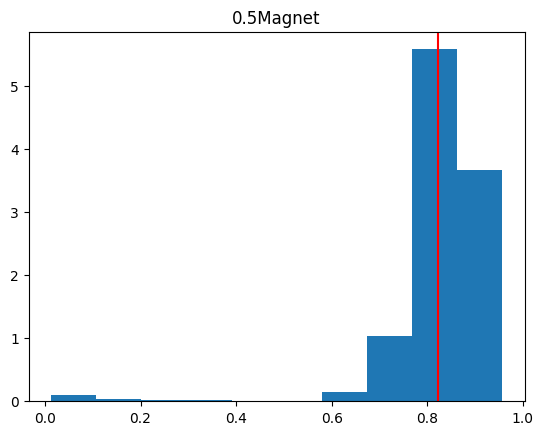

0.6000000000000001


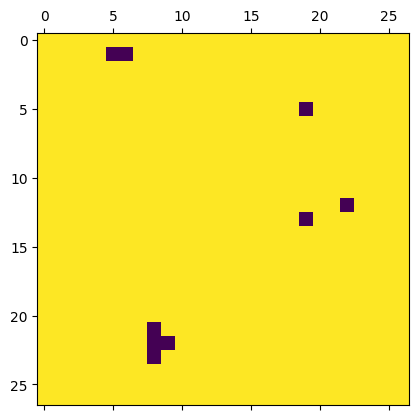

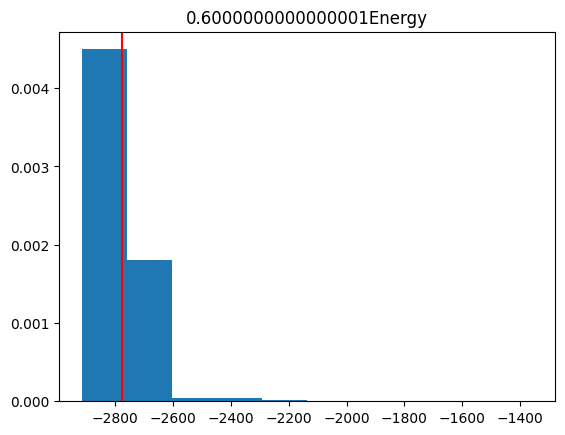

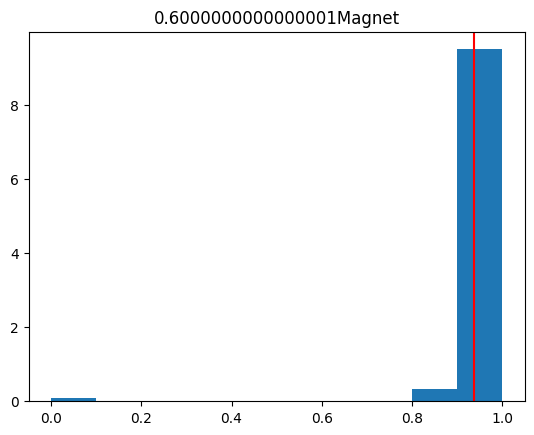

0.7000000000000001


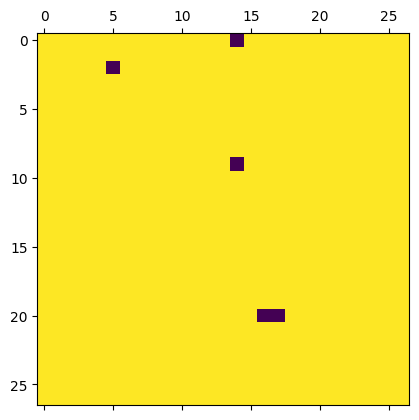

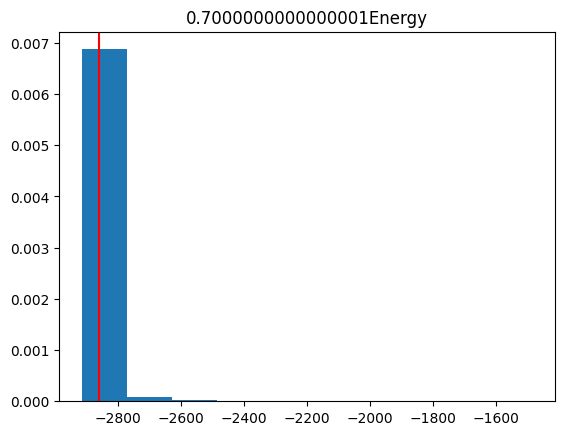

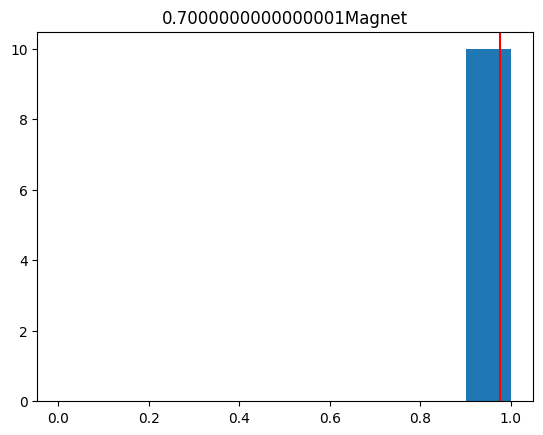

0.8


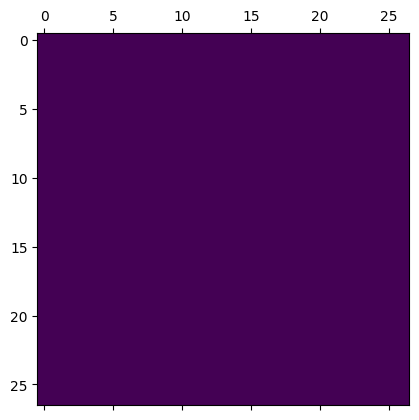

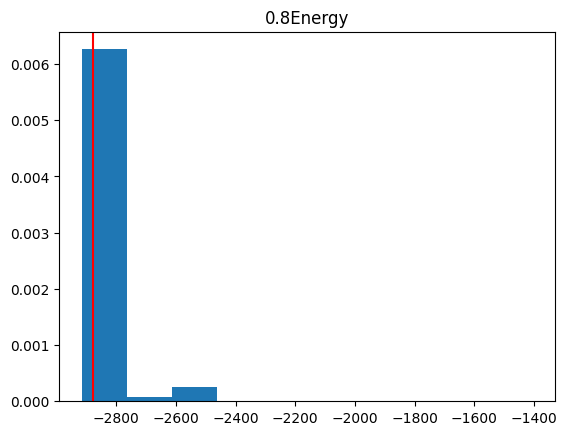

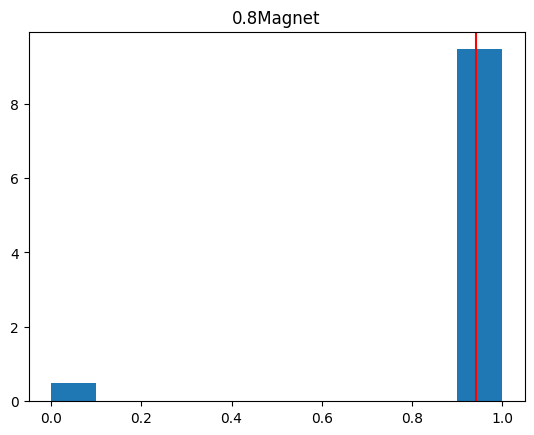

0.9


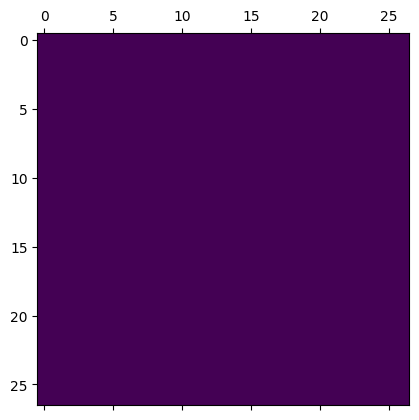

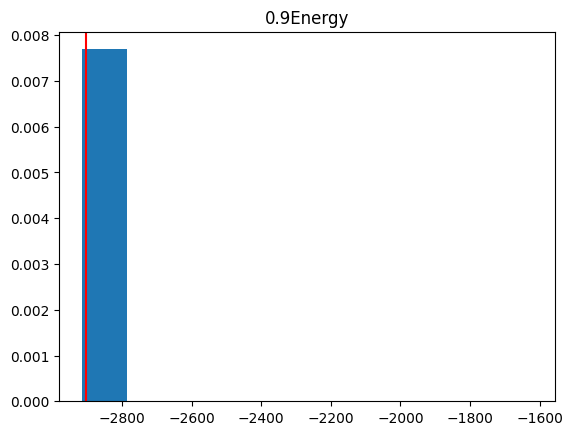

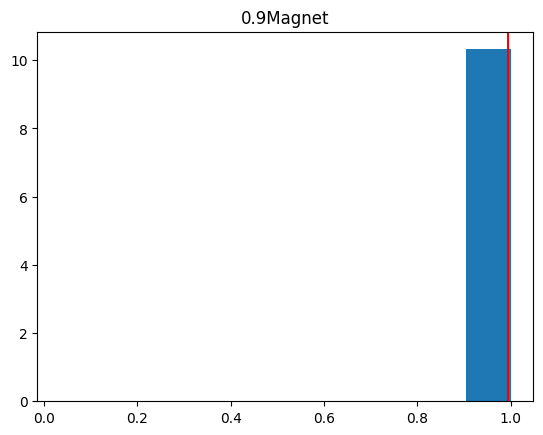

1.0


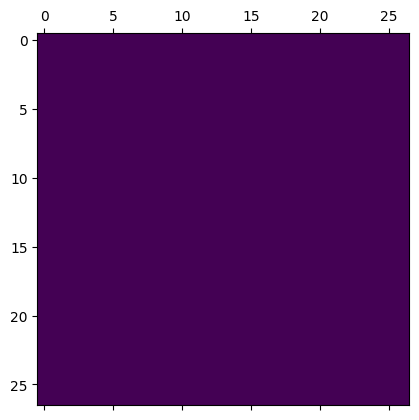

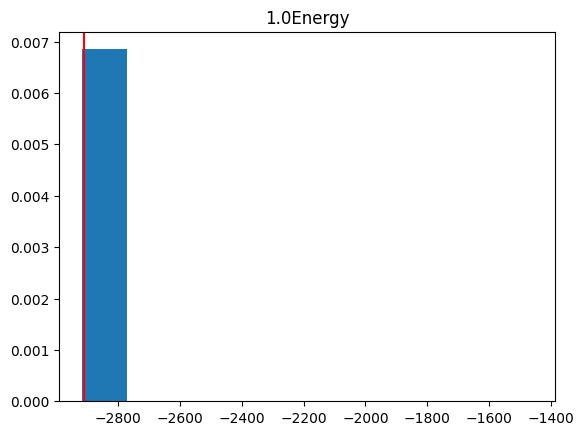

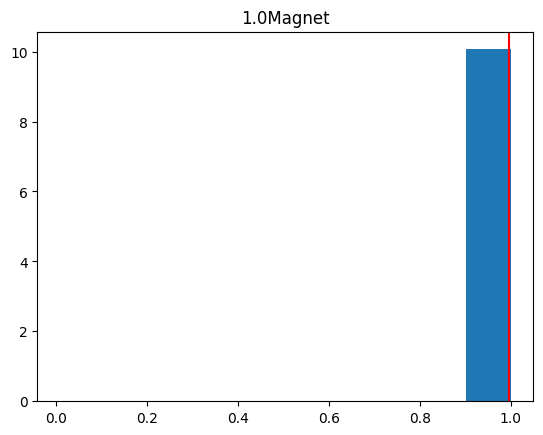

In [ ]:
def dataMCMC(conf, sweep, beta, colors):
  PE = []
  M2 = []
  for t in range(sweep):
    for color in colors:
        dE = np.exp(-beta*fastDeltaE(color, conf))
        prob = np.random.rand(L,L)
        flip = np.logical_and((prob < dE),color)
        conf[flip] = -conf[flip]
    PE.append(sum(FastEnergy(conf)))
    M2.append((1/L**2*sum(conf))**2)
  return PE, M2, conf
beta = np.linspace(0, 1., 11)
E_ave = []
M_ave = []
E_err = []
M_err = []
for b in beta:
  print(b)
  conf = np.random.choice((1,-1),[L,L])
  PE, M2, conf = dataMCMC(conf,3000,b, colors)
  plt.matshow(conf)
  plt.show()
  (mean1, variance, error1, autocorrelation) = Stats(np.array(PE))
  E_ave.append(mean1)
  E_err.append(error1)
  (mean2, variance, error2, autocorrelation) = Stats(np.array(M2))
  M_ave.append(mean2)
  M_err.append(error2)
  plt.hist(PE, density = True)
  plt.title(str(b)+"Energy")
  plt.axvline(x=mean1,color = 'r')
  plt.show()
  plt.hist(M2, density = True)
  plt.title(str(b)+"Magnet")
  plt.axvline(x=mean2,color = 'r')
  plt.show()

10


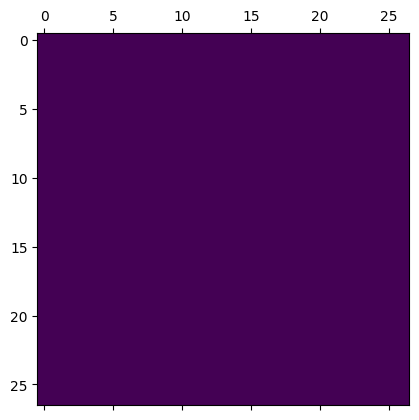

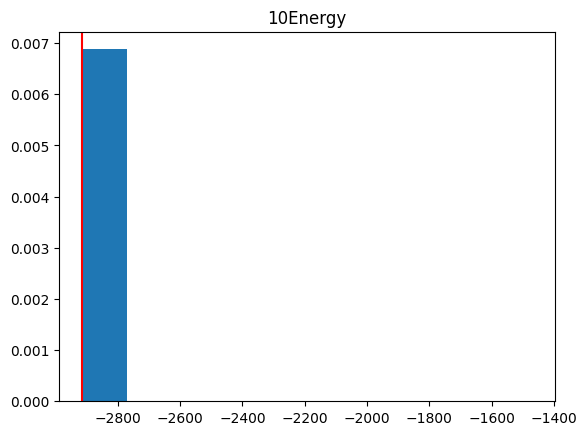

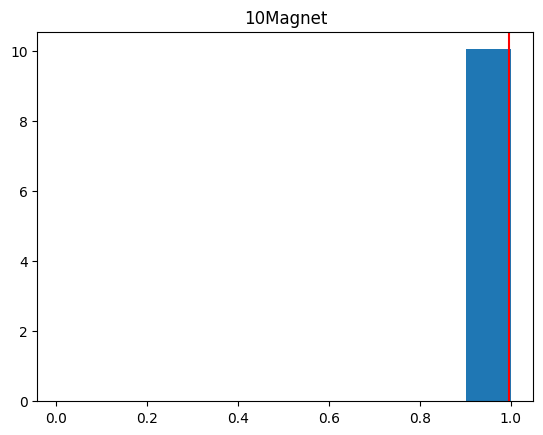

In [ ]:
b = 10
print(b)
conf = np.random.choice((1,-1),[L,L])
PE, M2, conf = dataMCMC(conf,3000,b, colors)
plt.matshow(conf)
plt.show()
(mean1, variance, error1, autocorrelation) = Stats(np.array(PE))
#E_ave.append(mean1)
#E_err.append(error1)
(mean2, variance, error2, autocorrelation) = Stats(np.array(M2))
#M_ave.append(mean2)
#M_err.append(error2)
plt.hist(PE, density = True)
plt.title(str(b)+"Energy")
plt.axvline(x=mean1,color = 'r')
plt.show()
plt.hist(M2, density = True)
plt.title(str(b)+"Magnet")
plt.axvline(x=mean2,color = 'r')
plt.show()

ValueError: ignored

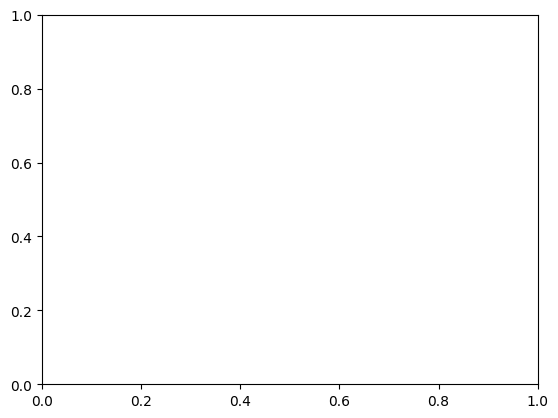

In [ ]:
beta=np.append(beta,10)
Bs=[0,1]
Es = [0,-4*27*27]
Ms = [0,1]
plt.plot(beta, E_ave,'.')
plt.show()
plt.errorbar(beta, E_ave, yerr=E_err)
plt.title("E average")
plt.plot(Bs, Es, 'o')
plt.show()
plt.plot(beta, M_ave,'.')
plt.show()
plt.errorbar(beta, M_ave, yerr=M_err)
plt.title("M^2 average")
plt.plot(Bs, Ms, 'o')
plt.show()

In [ ]:
import scipy.interpolate as iplat
beta = np.linspace(0, 1., 11)
b = []
a = np.linspace(0,1,50)#beta
deri = iplat.UnivariateSpline(beta, E_ave).derivative()
for i in (1/a):
  b.append(-(1/i)**2*deri(1/i))
plt.plot(1/a,b)
plt.xlim(0,10)
plt.show()

In [ ]:
conf = np.random.choice((1,-1),[L,L])
PE, M2, conf = dataMCMC(conf,1000,100, colors)
(mean1, variance, error1, autocorrelation) = Stats(np.array(PE))
(mean2, variance, error2, autocorrelation) = Stats(np.array(M2))
print(mean1, mean2)
conf = np.random.choice((1,-1),[L,L])
PE, M2, conf = dataMCMC(conf,1000,0.01, colors)
(mean1, variance, error1, autocorrelation) = Stats(np.array(PE))
(mean2, variance, error2, autocorrelation) = Stats(np.array(M2))
print(mean1, mean2)

In [ ]:
L = 81
conf = np.random.choice((1,-1),[L,L])
x,y=np.indices((L,L))
red=np.logical_and((x+y) % 2==0   , np.logical_and(x<L-1,y<L-1))
red[L-1,L-1]=True
blue=np.logical_and((x+y) % 2==1   , np.logical_and(x<L-1,y<L-1))
green=np.logical_and((x+y) % 2==0   , np.logical_or(x==L-1,y==L-1))
green[L-1,L-1]=False
yellow=np.logical_and((x+y) % 2==1   , np.logical_or(x==L-1,y==L-1))
colors = [red, blue, green, yellow]

In [ ]:
def newDataMCMC(conf, sweep, beta, colors):
  for t in range(sweep):
    for color in colors:
        dE = np.exp(-beta*fastDeltaE(color, conf))
        prob = np.random.rand(L,L)
        flip = np.logical_and((prob < dE),color)
        conf[flip] = -conf[flip]
  return conf
beta = np.array([0.,0.3,0.4,0.5,0.6,10])
for b in beta:
  print(b)
  conf = np.random.choice((1,-1),[L,L])
  conf = newDataMCMC(conf,1000,b, colors)
  plt.matshow(conf)
  plt.show()
  x,y=np.indices((L,L))
  small_conf = np.zeros((27,27))
  for i in range(27):
    for j in range(27):
      grid1=np.logical_and(np.logical_and(x>=i*3,y>=j*3),np.logical_and(x<(i+1)*3,y<(j+1)*3))
      if sum(conf[grid1])>0:
        small_conf[i][j] = 1
      else:
        small_conf[i][j] = -1
  plt.matshow(small_conf)
  plt.show()
  x,y=np.indices((27,27))
  little_conf = np.zeros((9,9))
  for i in range(9):
    for j in range(9):
      grid2=np.logical_and(np.logical_and(x>=i*3,y>=j*3),np.logical_and(x<(i+1)*3,y<(j+1)*3))
      if sum(small_conf[grid2])>0:
        little_conf[i][j] = 1
      else:
        little_conf[i][j] =-1
  plt.matshow(little_conf)
  plt.show()





In [ ]:
L = 81
conf = np.random.choice((1,-1),[L,L])
x,y=np.indices((L,L))
red1=np.logical_and((x+y) % 2==0   , np.logical_and(x<L-1,y<L-1))
red1[L-1,L-1]=True
blue1=np.logical_and((x+y) % 2==1   , np.logical_and(x<L-1,y<L-1))
green1=np.logical_and((x+y) % 2==0   , np.logical_or(x==L-1,y==L-1))
green1[L-1,L-1]=False
yellow1=np.logical_and((x+y) % 2==1   , np.logical_or(x==L-1,y==L-1))
colors81 = [red1, blue1, green1, yellow1]
L = 27
conf = np.random.choice((1,-1),[L,L])
x,y=np.indices((L,L))
red=np.logical_and((x+y) % 2==0   , np.logical_and(x<L-1,y<L-1))
red[L-1,L-1]=True
blue=np.logical_and((x+y) % 2==1   , np.logical_and(x<L-1,y<L-1))
green=np.logical_and((x+y) % 2==0   , np.logical_or(x==L-1,y==L-1))
green[L-1,L-1]=False
yellow=np.logical_and((x+y) % 2==1   , np.logical_or(x==L-1,y==L-1))
colors27 = [red, blue, green, yellow]

In [ ]:
def dataMCMC2(conf, sweep, beta, colors, L):
  M2 = []
  for t in range(sweep):
    for color in colors:
        dE = np.exp(-beta*fastDeltaE(color, conf))
        prob = np.random.rand(L,L)
        flip = np.logical_and((prob < dE),color)
        conf[flip] = -conf[flip]
    M2.append((1/L**2*sum(conf))**2)
  return M2, conf
ms1 = []
ms2 = []
beta = np.linspace(0.4, 0.6, 11)
for b in beta:
  L = 81
  conf = np.random.choice((1,-1),[L,L])
  M2, conf = dataMCMC2(conf,1000,b, colors81, 81)
  plt.show()
  x,y=np.indices((L,L))
  small_conf = np.zeros((27,27))
  for i in range(27):
    for j in range(27):
      grid1=np.logical_and(np.logical_and(x>=i*3,y>=j*3),np.logical_and(x<(i+1)*3,y<(j+1)*3))
      if sum(conf[grid1])>0:
        small_conf[i][j] = 1
      else:
        small_conf[i][j] = -1
  M2=((1/L**2*sum(conf))**2)
  ms1.append(M2)
  L = 27
  conf = np.random.choice((1,-1),[L,L])
  M2, conf = dataMCMC2(conf,1000,b, colors27, 27)
  (mean2, variance, error2, autocorrelation) = Stats(np.array(M2))
  ms2.append(mean2)
plt.plot(beta, ms1,label="CG")
plt.plot(beta, ms2,label="27")
plt.legend()
plt.show()

In [ ]:
import scipy
beta = np.linspace(0.31,0.69,50)
a = scipy.interpolate.interp1d(ms2, ms1)
plt.plot(beta, a(beta),label='interpolation')
plt.plot(beta,beta,label='y=x')
plt.legend()
plt.show()

In [ ]:
point = (0.5,a(0.5))
beta = np.linspace(0.001,0.98,50)
plt.plot(beta,beta,label='y=x')
plt.plot(beta, a(beta),label='interpolation')
for i in range(15):
  if i % 2 == 0:
    new_point = (a(point[0]),point[1])
  else:
    new_point = (point[0],a(point[1]))
  plt.arrow(point[0],point[1],new_point[0]-point[0],new_point[1]-point[1])
  point = new_point
plt.legend()
plt.show()

In [ ]:
import math
import scipy.interpolate as iplat
mini = 0.3
b = 0
beta = np.linspace(0.32,0.68,50)
for i in beta:
  if abs(i-a(i))<mini:
    b = i
    mini = abs(i-a(i))
deris = iplat.UnivariateSpline(beta, a(beta)).derivative()
deri=deris(b)
print("beta:",b)
print("derivative:",deri)
v=1/math.log(deri,3)
print("V:",v)